# Simple Linear Regression


#### Loading modules.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics


In [64]:
#Reading the csv file.
salary = pd.read_csv('resources/salary.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [65]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


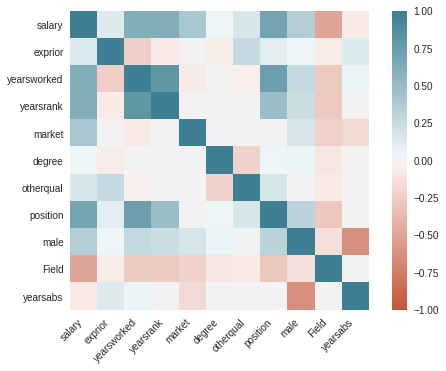

In [66]:
correlation = salary.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

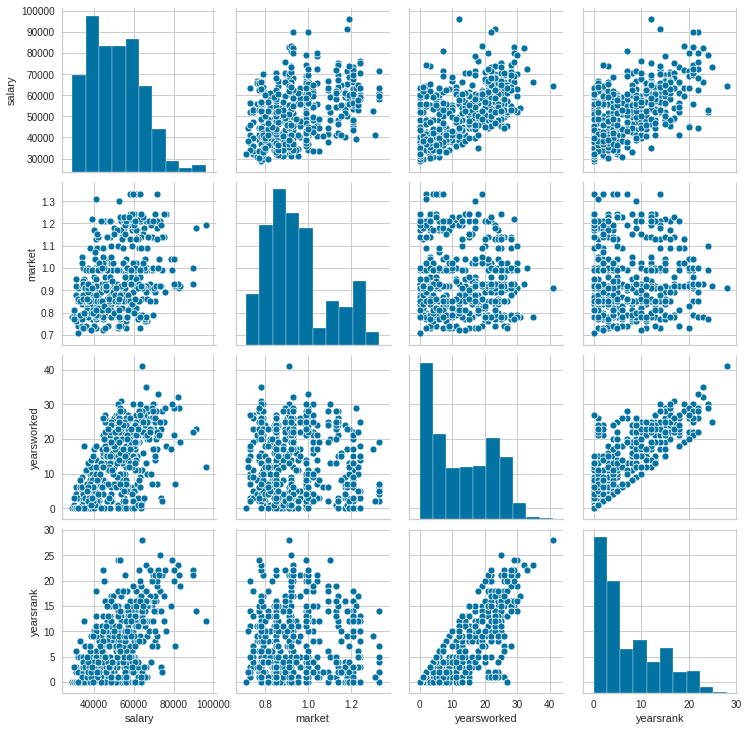

In [67]:
salary_corr = salary[['salary', 'market', 'yearsworked', 'yearsrank']]

sns.pairplot(salary_corr)
plt.show()

In [68]:
# Take the log of population and gdp_per_capita
salary_corr['log_yearsworked'] = np.log10(salary_corr['yearsworked'])
salary_corr['log_salary'] = np.log10(salary_corr['salary'])

# Drop the non-transformed columns
salary_corr = salary_corr.drop(columns = ['yearsworked', 'salary'])

/home/recruit/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWa

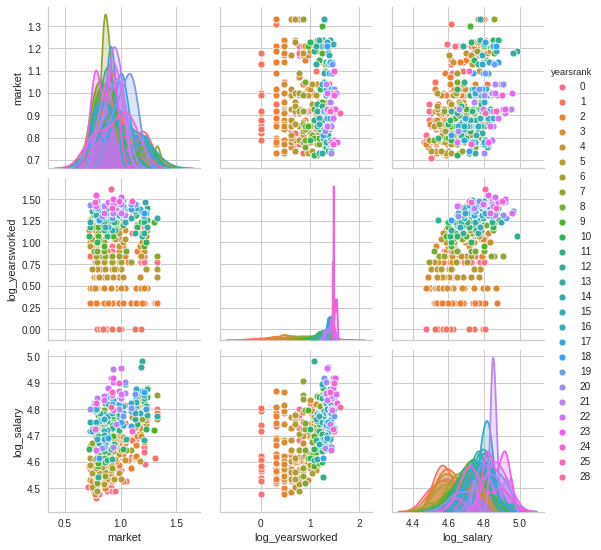

In [69]:
sns.pairplot(salary_corr, hue = 'yearsrank')
plt.show()

By using ‘.corr()’ and ‘.heatmap()’ I am able to visualize and understand the relationship between our variables.

With our example, we spotted how strong the correlation of years worked, years ranked, market and position are to salary. These variables are factors that actually determine salry in various ways. Looking at the chart we see that the values of correlation are closer to one showing a strong relationship.

- __Salary and Years worked__.
The years worked influence the amount you get cause they also account or can be viewed also as experience in the work field. It can help you justify and negotiate a salary you think you deserve. <br><br>

- __Salary and Market__.
The type of market can be an determining factor for the salary an individual gets. markets could be accounted for as types of industries one is in. Some industries/markets are in demand and have scarce skills, which make them very expensive. This explaining that if you work in a scarce skill industry you are bound to get high salary.


### Split the data into a training and test set   

In [70]:
# Creating the target variable for the test and training sets of data
X = salary['yearsworked']
y = salary['salary']

# Splitting the data into test and training sets by 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)
print(X_train.shape)


(385,)


In [71]:
# Filling my NaN value with the mean of the column
salary = salary.apply(lambda x: x.fillna(x.mean()))

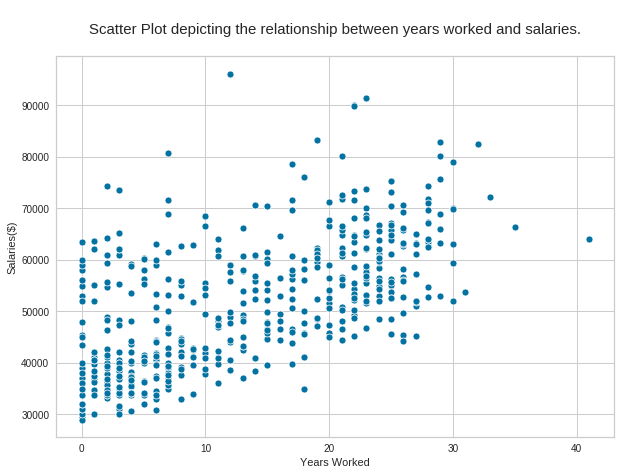

In [72]:
plt.figure(figsize = (10,7))
sns.scatterplot(salary['yearsworked'],salary['salary'])
plt.title('\nScatter Plot depicting the relationship between years worked and salaries.\n',fontsize=15)
plt.ylabel('Salaries($)')
plt.xlabel('Years Worked')
plt.show()

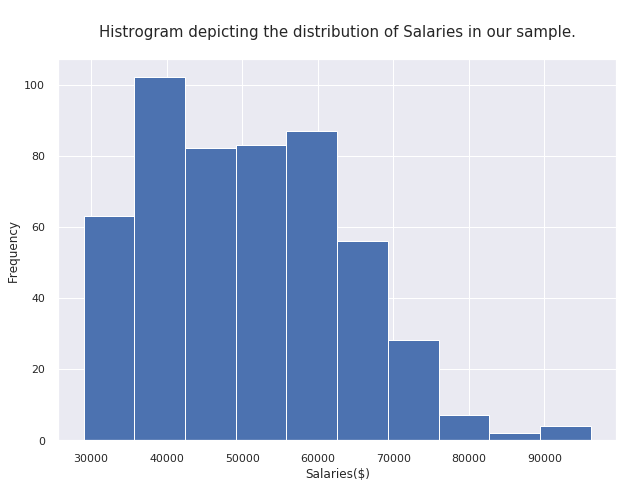

In [73]:

sns.set()
plt.figure(figsize = (10,7))
plt.hist(salary['salary'])
plt.title('\nHistrogram depicting the distribution of Salaries in our sample.\n',fontsize=15)
plt.xlabel('Salaries($)')
plt.ylabel('Frequency')
plt.show()

In [74]:
missing_values = X_train.isnull().sum().sum()
print('Number of missing values:',missing_values)

highest =  X_train.max()
print('The highest value is: ', highest)

Number of missing values: 0
The highest value is:  41


In [75]:
X_train.describe()

count    385.000000
mean      12.916883
std        9.470533
min        0.000000
25%        4.000000
50%       11.000000
75%       22.000000
max       41.000000
Name: yearsworked, dtype: float64

In [76]:
y_train.describe()

count      385.000000
mean     50699.727547
std      12504.527436
min      29500.000000
25%      40000.000000
50%      49667.000000
75%      60056.000000
max      91405.000000
Name: salary, dtype: float64

### Running a simple linear regression for Salary with one predictor variable: Years Worked.

In [77]:
model = sm.OLS(y_train,X_train).fit()

# Print the coefficients
print(model.params)
print(model.summary())

yearsworked    2853.979387
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              1255.
Date:                Thu, 06 Feb 2020   Prob (F-statistic):                   4.57e-123
Time:                        18:19:53   Log-Likelihood:                         -4449.2
No. Observations:                 385   AIC:                                      8900.
Df Residuals:                     384   BIC:                                      8904.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975

In [78]:
print('R2: ', model.rsquared)

R2:  0.7657097942484418


Our R-squared is 0.766 this means is 76.6%, this indicates that the variables are closely related to each other and follow the measured benchmark.
<br><br>
An unstandardized coefficient represents the amount of change in a dependent variable Y due to a change of 1 unit of independent variable X. So in our case is true the salary does increase with years worked when we look at our graphs above.

In [79]:
from scipy.stats.stats import pearsonr
pearsonr(X_train, y_train)

(0.6485401789476424, 2.5487932400216935e-47)

### Expected salary for someone with 12 years’ work experience.

In [80]:
print('Someone who has worked for 12 years earns:',model.predict(12))

Someone who has worked for 12 years earns: [34247.75264521]


### Expected salary for someone with 80 years

In [81]:
print('Someone who has worked for 80 years earns:',model.predict(80))

Someone who has worked for 80 years earns: [228318.35096806]


### Other employee characteristics might influence their salary?

Other factors that can infulence salary are:
- Years ranked.
- Market.
- Experience prior
- qualifications
- Gender

### How does your model compare when running it on the test set

In [82]:
predictions = model.predict(y_test)
print('Standard errors: ', model.bse)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Standard errors:  yearsworked    80.56199
dtype: float64


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predictions = model.predict(X_test)